<div style="text-align: center;">
  <h1>Updating Master Thesis' Analysis with Modern Statistical Libraries</h1>
  <h3>A Study Overview</h3>

  <hr>

  <p><b>Authors:</b> C. Fabris; P. C. Meletti<br>
  <b>Affiliation:</b> Universidade Estadual de Londrina - UEL / Laboratório de Ecofisiologia Animal<br>
  <b>Date:</b> 26 September 2025</p>

  <hr>
</div>

---

> This document provides an overview of the behavioral data collected in the original study by Fabris (2022), which investigated the sequential application of three behavioral tests in zebrafish (Danio rerio) exposed to ethanol. The original study applied a tiered-test battery consisting of a light-dark test, a novel tank test, and a swimming endurance test, aiming to assess stress- and anxiety-like behaviors while optimizing sampling effort and resources. Initial analyses were conducted using Excel, SigmaPlot, and Past statistical approaches. 
> In the present work, the dataset is being re-evaluated using modern, fully open-access, and reproducible tools in Python, leveraging statistical libraries to allow public inspection and verification via GitHub. This updated analysis seeks to improve transparency, incorporate univariate, multivariate, and Principal Component Analysis (PCA). The ultimate goal is to provide a robust, reproducible, and modernized interpretation of the dataset.

---

![](images/zebrafish.jpg)

<div style="text-align: center;">
<h2>Introduction</h2>
</div>

<div style="text-align: justify;">

<p>Over the past two decades, the zebrafish (<i>Danio rerio</i>) has become a leading vertebrate model in neuroscience and pharmacology, offering a rich behavioral repertoire alongside practical advantages such as low maintenance cost, high reproductive output, and evolutionary conservation of key neurotransmitter systems (<a href="https://doi.org/10.1111/j.1469-185X.2007.00054.x" target="_blank">Spence et al., 2008</a>; <a href="https://doi.org/10.1007/s11065-014-9257-3" target="_blank">Kalueff et al., 2014</a>; <a href="https://doi.org/10.1146/annurev-neuro-072116-031646" target="_blank">Orger & de Polavieja, 2017</a>). These features have made zebrafish increasingly valuable for translational research on stress, anxiety, and neuropsychiatric disorders (<a href="https://doi.org/10.1016/j.bbr.2010.05.031" target="_blank">Stewart et al., 2012</a>; <a href="https://doi.org/10.1016/j.bbr.2009.10.008" target="_blank">Maximino et al., 2010</a>).</p>

<p>Despite this progress, zebrafish studies remain dominated by <b>single-test protocols</b> (e.g., light–dark test, novel tank test, shoaling), which inflate sample sizes, increase costs, and limit opportunities to integrate multidomain behavioral data. By contrast, rodent research has long benefited from <b>sequential behavioral batteries</b>, where the same individuals are tested across paradigms, maximizing data yield per subject and enabling multidimensional profiling (<a href="https://doi.org/10.1016/S0031-9384(01)00511-6" target="_blank">McIlwain et al., 2001</a>; <a href="https://doi.org/10.1016/j.bbr.2011.10.041" target="_blank">Blokland et al., 2012</a>). This methodological gap highlights the need for more efficient and integrative approaches in zebrafish research, consistent with the <b>3Rs principle</b> (Replacement, Reduction, Refinement) (<a href="https://doi.org/10.1007/s11948-006-0006-6" target="_blank">Kolar, 2006</a>).</p>

<p>The original master’s thesis by <b>Fabris (2022)</b> addressed this gap by applying a <b>sequential test battery</b> in zebrafish exposed to ethanol, a well-documented behavioural modulator (<a href="https://doi.org/10.1016/j.pbb.2006.07.013" target="_blank">Gerlai et al., 2006</a>; <a href="https://doi.org/10.1016/j.pbb.2019.172790" target="_blank">Bernardo et al., 2019</a>). The design combined, conceptually in this order:</p>

<ul>
<li><b>Light–Dark Test (LDT)</b> → anxiety-like and phototaxis (<a href="https://doi.org/10.1007/978-1-61779-521-3_12" target="_blank">Stewart et al., 2011</a>; <a href="https://doi.org/10.1163/156853912X640443" target="_blank">Maximino et al., 2012</a>)</li>
<li><b>Novel Tank Test (NTT)</b> → anxiety-like and locomotor exploration (<a href="https://doi.org/10.1007/978-1-61779-521-3_12" target="_blank">Stewart et al., 2011</a>; <a href="https://doi.org/10.1016/j.bbr.2017.06.003" target="_blank">Kysil et al., 2017</a>)</li>
<li><b>Endurance Assay</b> → physical performance as stress-related marker (<a href="https://doi.org/10.1016/S1546-5098(01)00005-7" target="_blank">Baemish et al., 1978</a>; <a href="https://doi.org/10.1016/S1095-6433(01)00042-6" target="_blank">Plaut, 2001</a>)</li>
</ul>

<p>This was the <b>first zebrafish sequential battery</b> spanning multiple domains, evaluated under pharmacological manipulation. Importantly, the study proposed <b>Principal Component Analysis (PCA)</b> as a framework to integrate behavioral endpoints and uncover latent dimensions beyond isolated ANOVAs.</p>

<hr>

<h3>🎯 Purpose of This Notebook</h3>

<p>The present notebook revisits the original dataset with <b>modern, open-source statistical tools in Python</b>. Analyses that were previously conducted in Excel, SigmaPlot, and Past are re-implemented here using reproducible workflows with libraries such as <code>pandas</code>, <code>scipy</code>, <code>statsmodels</code>, and <code>scikit-learn</code>.</p>

<p>By modernizing the statistical pipeline, this work aims to:</p>

<ul>
<li>✅ Ensure <b>transparency and reproducibility</b> (with all code openly available).</li>
<li>✅ Apply <b>univariate, multivariate, and PCA analyses</b> within a coherent framework.</li>
<li>✅ Demonstrate how sequential test batteries can be leveraged in zebrafish research to enhance efficiency and translational relevance.</li>
</ul>

<p>Ultimately, this updated analysis not only strengthens the original conclusions but also sets a precedent for <b>open, reproducible, and resource-efficient behavioral neuroscience</b>.</p>

</div>

---

The **main question** of the work is, therefore, **methodological in essence**:

>Can a sequential behavioral test battery in zebrafish reliably measure stress- and anxiety-like behaviors under pharmacological modulation, without losing sensitivity compared to single, isolated tests, while enabling multidomain analysis of behavior using modern statistical approaches like PCA?

---

## Libraries and Settings

In [1]:
# 🐍📦 Import libraries for analysis & visualization

# 📊 Data handling
import pandas as pd
import numpy as np

# 📈 Statistical analysis
from scipy import stats
from scipy.stats import shapiro
import scikit_posthocs as sp

# 🎨 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Plot & style settings
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (8, 6)
pd.set_option('display.max_columns', None)

## Data Extraction

In [2]:
data_path = r"C:\Users\caiqu\OneDrive\Documents\Masters"

# 📂 Load datasets
df = pd.read_csv(f"{data_path}/battery_suite_1.csv") # Full battery (LDT - NTT - Endurance)

df = df.drop(columns=['Unnamed: 0']) # Drop unnecessary index column
df = df.set_index('fish_id') # Set fish_id as index

<div style="text-align: center;">
    <h3>About the Dataset</h3>
</div>

<div style="text-align: justify">
This dataset was generated by <b>Fabris (2022)</b> at the Laboratory of Animal Ecophysiology in the Universidade Estadual de Londrina (UEL), in experiments testing the effects of ethanol exposure on zebrafish (<i>Danio rerio</i>). Each entry corresponds to one fish, with identifiers linking group, ethanol treatment and exposure time. Variables include behavioral measures (<i>e.g.</i> latency, zone preference, locomotion, velocity, resistance indices), morphological traits (lengths, weight, condition factor, sex, blood sugar), and environmental parameters (water conductivity and pH). Together, these records provide a multidimensional view of how ethanol affects zebrafish behavior and physiology under controlled laboratory conditions.
</div>

## Checking Overall Numerical Data Normality

In [3]:
# Checking Normality for each numerical column
num_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
num_cols = num_df.columns
normal_cols = []

for col in num_cols:
    stat, p = shapiro(df[col])
    if p > 0.05:
        normal_cols.append((col, stat, p, True))

# Display results
if normal_cols:
    print("Columns that are normally distributed:")
    for col, stat, p, in normal_cols:
        print(f"{col}: stat={stat:.3f}, p={p:.3f}")
else:
    print("No columns are normally distributed.")


No columns are normally distributed.


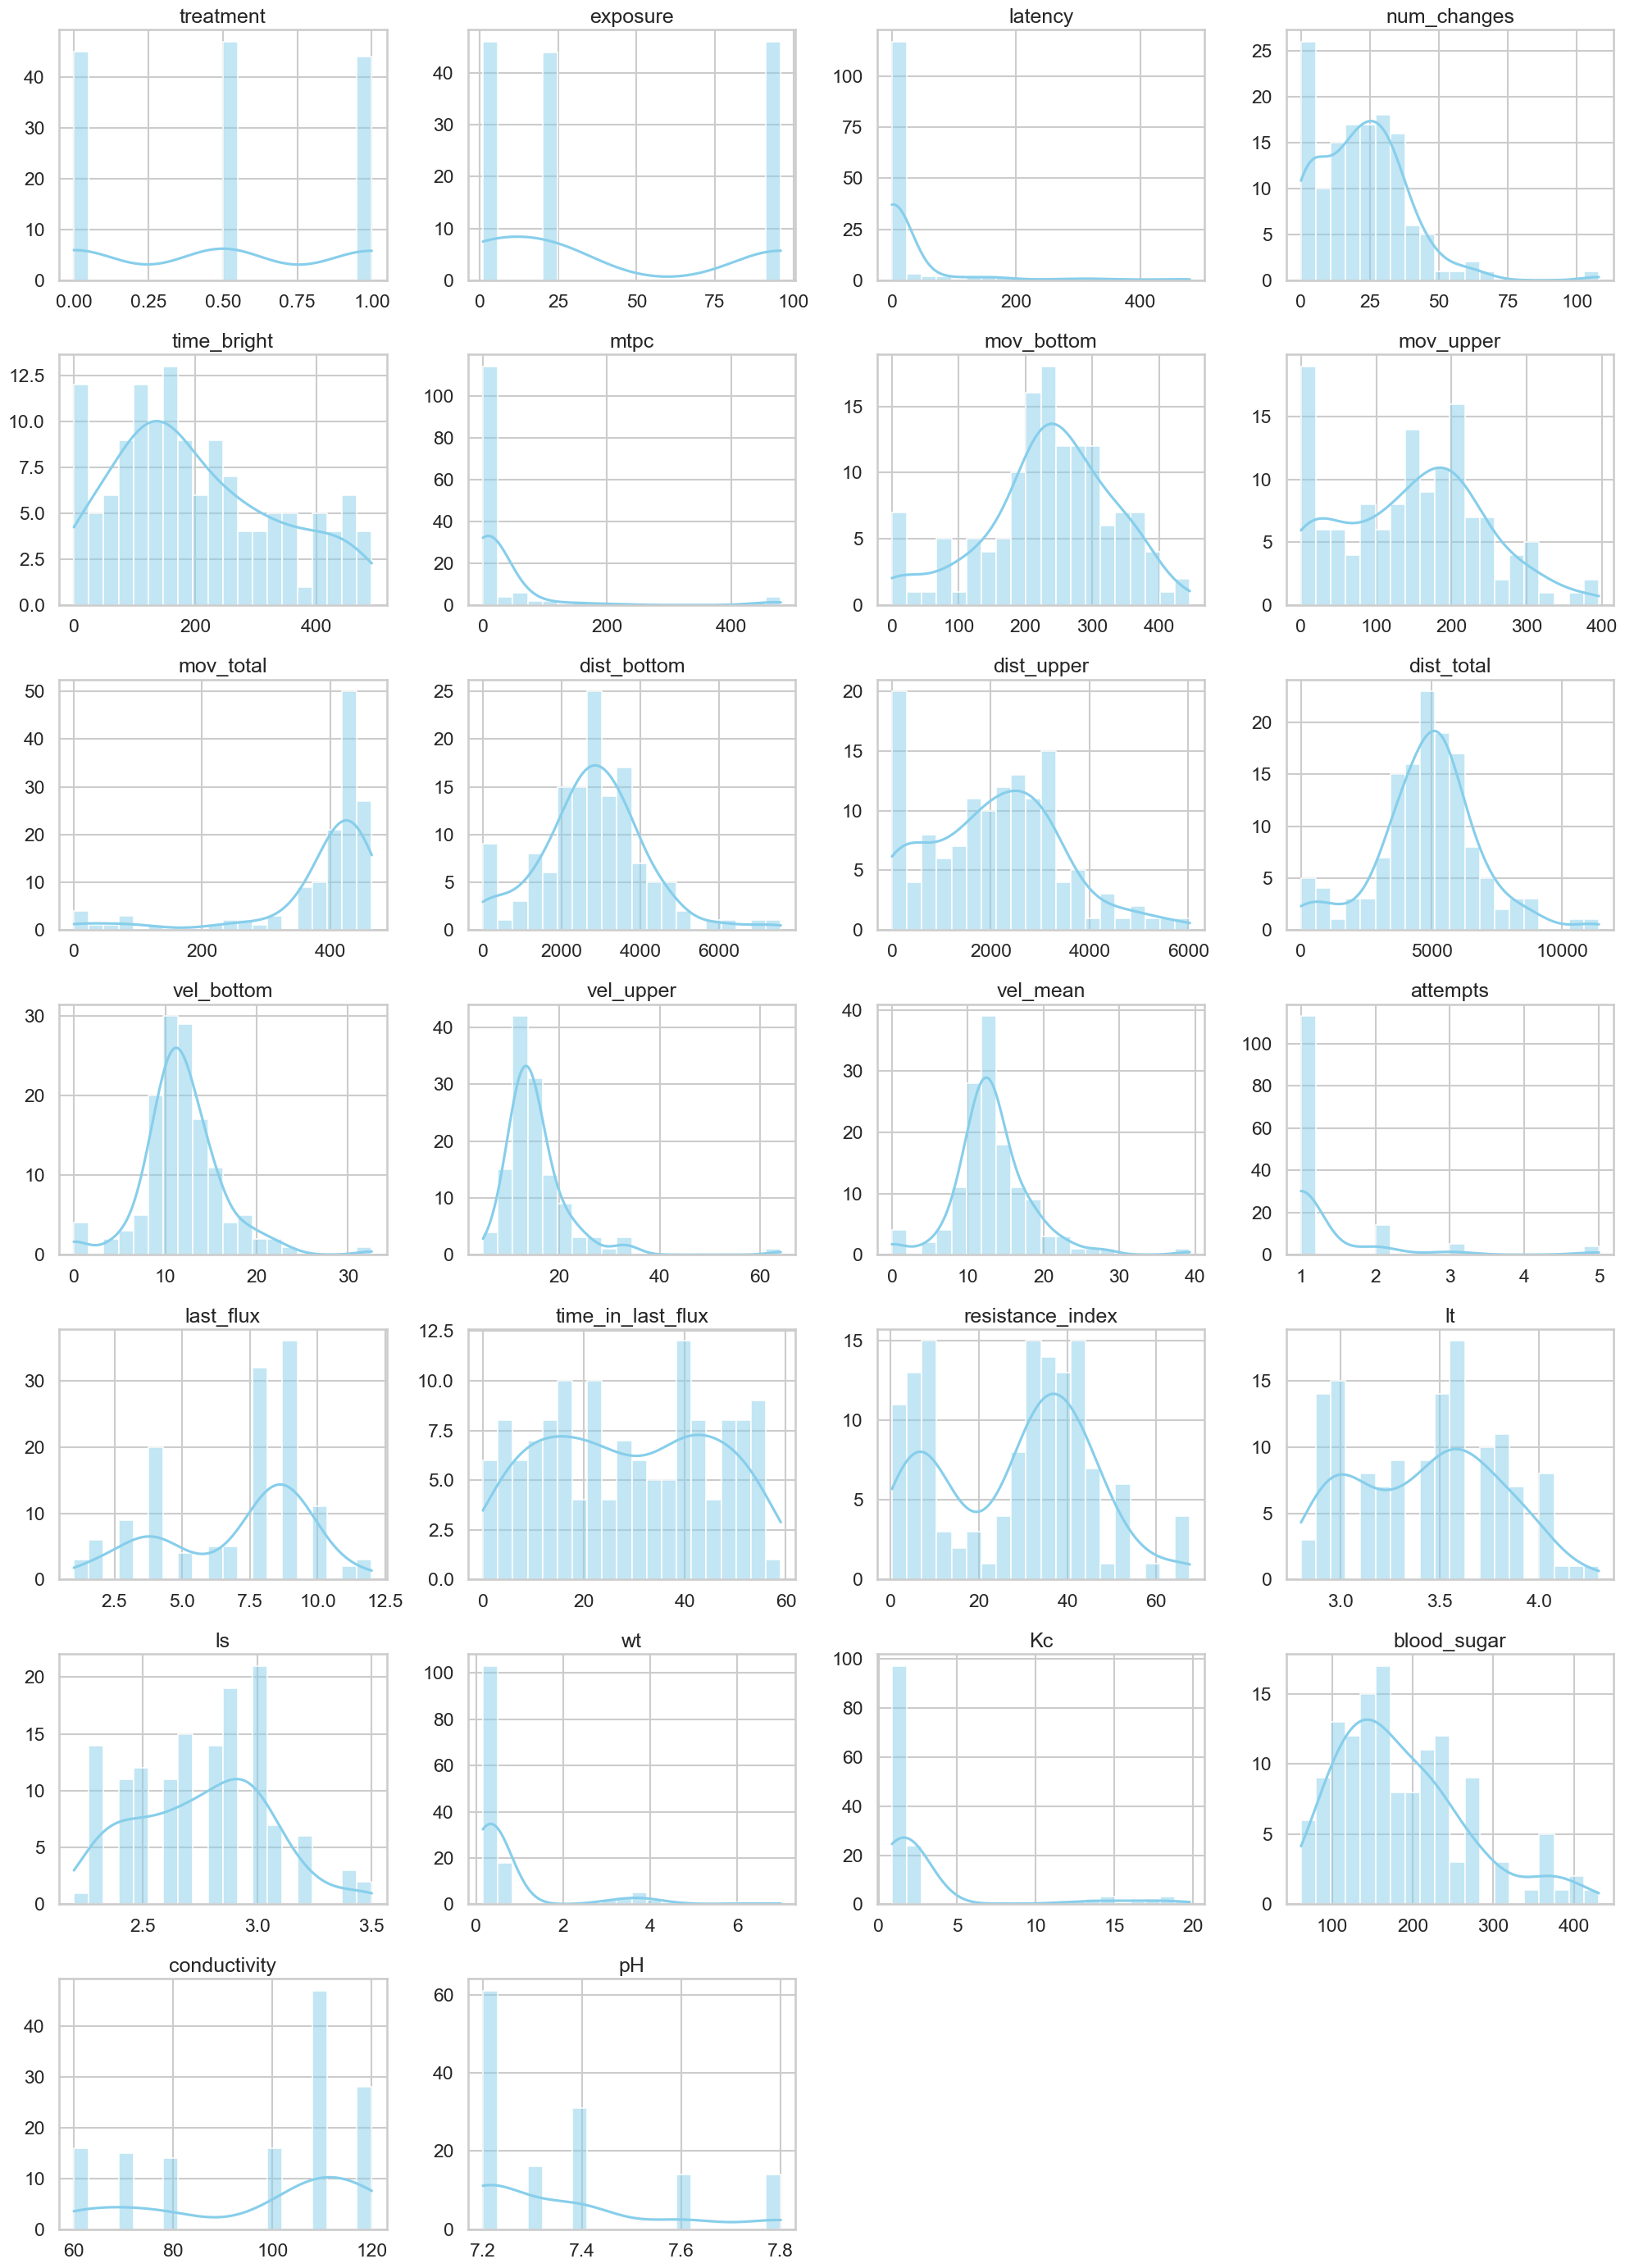

In [4]:
# Visualizing numerical data distribution
n_cols = 4 # Number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

All parameters are **non-normal**. Therefore, Parametric tests (t-tests, ANOVA) cannot be reliably used on this raw dataset.

## Checking Overall Data Correlation

<div style="text-align: justify;">
    <p>
    We are using Spearman correlation instead of Pearson because our data is not normally distributed, as previously indicated by the Shapiro–Wilk tests. Spearman’s method is a non-parametric rank-based correlation, which assesses monotonic relationships between variables without assuming linearity or normality. This makes it more robust for behavioral datasets like this one, where distributions can be skewed or contain outliers, ensuring that the correlations reflect genuine associations rather than artifacts of distribution shape.
    </p>
</div>

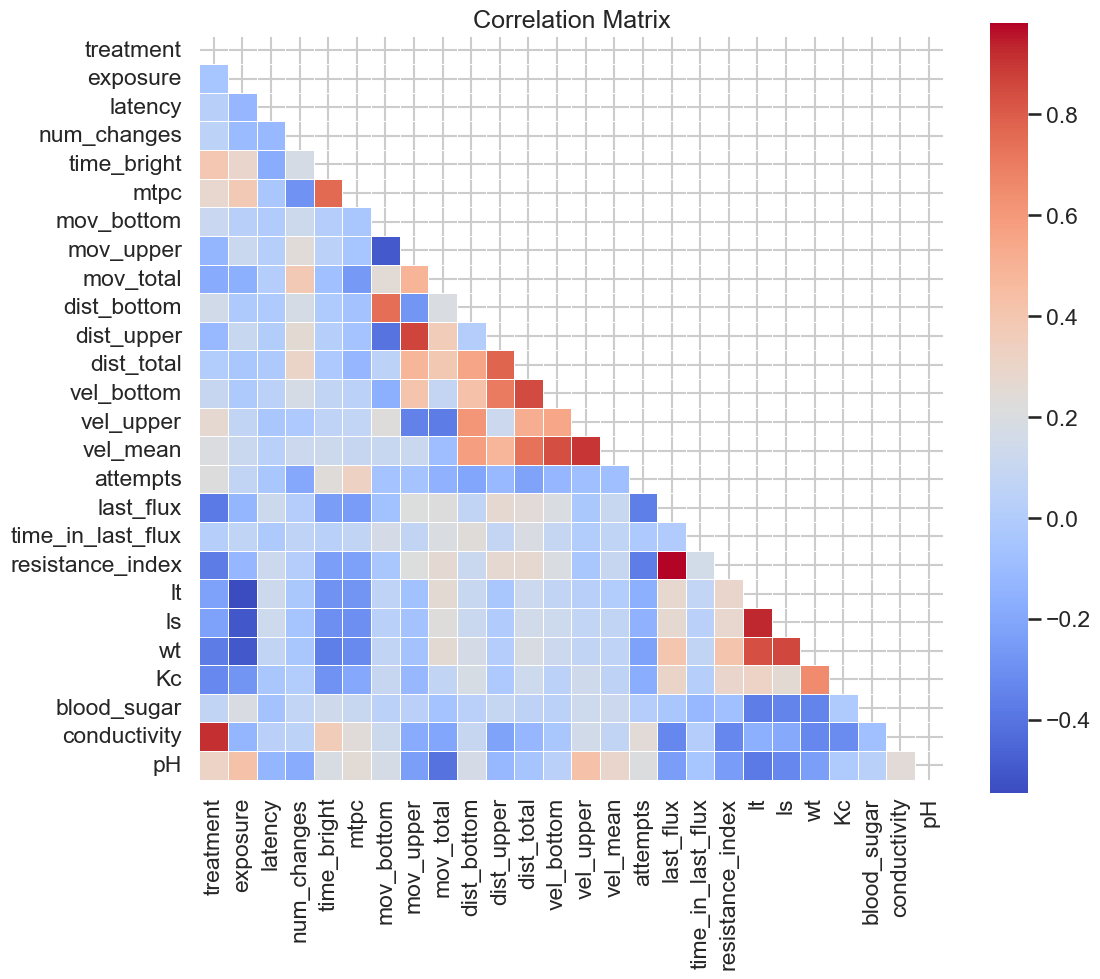

In [5]:
# Spearman correlation matrix
corr_matrix = num_df.corr(method='spearman')

# Masking the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, mask=mask, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
corr_matrix

,treatment,exposure,latency,num_changes,time_bright,mtpc,mov_bottom,mov_upper,mov_total,dist_bottom,dist_upper,dist_total,vel_bottom,vel_upper,vel_mean,attempts,last_flux,time_in_last_flux,resistance_index,lt,ls,wt,Kc,blood_sugar,conductivity,pH
treatment,1.000000,-0.044206,0.026576,0.051510,0.392170,0.279492,0.107158,-0.131902,-0.182760,0.147261,-0.110354,0.001621,0.099073,0.267937,0.202206,0.221553,-0.381269,0.016537,-0.377483,-0.223562,-0.225473,-0.374242,-0.324482,0.072594,0.911310,0.314354
exposure,-0.044206,1.000000,-0.122483,-0.105961,0.291284,0.381572,0.023229,0.114001,-0.165357,-0.019129,0.100672,-0.033020,-0.018673,0.071576,0.116595,0.073158,-0.129518,0.065837,-0.123543,-0.544721,-0.506157,-0.500839,-0.279163,0.193368,-0.129351,0.422639
latency,0.026576,-0.122483,1.000000,-0.115026,-0.180245,-0.032821,-0.007952,0.018867,0.010669,-0.010745,0.008898,-0.017165,0.045444,-0.043641,0.033496,-0.036405,0.128835,-0.019404,0.117716,0.128987,0.131078,0.072644,-0.036902,-0.064993,0.037985,-0.131724
num_changes,0.051510,-0.105961,-0.115026,1.000000,0.174672,-0.286724,0.127920,0.238295,0.379913,0.176421,0.257489,0.304287,0.172963,-0.021174,0.122437,-0.196172,0.014595,0.061109,0.014132,-0.026601,-0.052505,-0.033831,0.000470,0.078928,0.047290,-0.175624
time_bright,0.392170,0.291284,-0.180245,0.174672,1.000000,0.765837,0.011330,0.045241,-0.079111,-0.009113,0.021709,-0.022392,0.070738,0.062630,0.125339,0.233125,-0.240770,0.028227,-0.238388,-0.282379,-0.303614,-0.364705,-0.290565,0.139268,0.367046,0.185022
mtpc,0.279492,0.381572,-0.032821,-0.286724,0.765837,1.000000,-0.042115,-0.046223,-0.258597,-0.065327,-0.056685,-0.121433,0.043758,0.077970,0.097045,0.331492,-0.247034,0.072834,-0.234451,-0.281905,-0.302824,-0.320792,-0.197337,0.105137,0.240778,0.254098
mov_bottom,0.107158,0.023229,-0.007952,0.127920,0.011330,-0.042115,1.000000,-0.494073,0.252232,0.748294,-0.404967,0.050100,-0.158847,0.228691,0.103779,-0.059172,-0.068508,0.168492,-0.032638,0.060570,0.030921,0.069581,0.097614,0.041240,0.128442,0.172813
mov_upper,-0.131902,0.114001,0.018867,0.238295,0.045241,-0.046223,-0.494073,1.000000,0.488109,-0.270768,0.868069,0.484962,0.415148,-0.352701,0.115633,-0.056103,0.214535,0.070359,0.217049,-0.069559,-0.066613,-0.066456,-0.118484,0.036426,-0.186644,-0.234873
mov_total,-0.182760,-0.165357,0.010669,0.379913,-0.079111,-0.258597,0.252232,0.488109,1.000000,0.199453,0.361969,0.387666,0.087153,-0.373534,-0.088529,-0.149426,0.223581,0.198174,0.261791,0.257492,0.225790,0.259679,0.073923,-0.057120,-0.207695,-0.410233
dist_bottom,0.147261,-0.019129,-0.010745,0.176421,-0.009113,-0.065327,0.748294,-0.270768,0.199453,1.000000,0.014039,0.556485,0.427206,0.617856,0.582384,-0.209750,0.071980,0.236154,0.113293,0.102627,0.113018,0.170850,0.179378,0.037399,0.097095,0.170539


---

<div style="text-align: center;">
    <h2>The Light-Dark Test</h2>
</div>

![](images/light-dark_box.jpg)

<div style="text-align: justify; line-height: 1.6;">
  <p>
    The light–dark test evaluates anxiety-like behavior in zebrafish by exploiting their preference for dark areas. Key measures, in chronological order, include <b>latency to choose a zone</b> (longer delays indicate higher anxiety; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8770442/">Fontana et al., 2021</a>), <b>first choice</b> (initial compartment entered; <a href="https://pubmed.ncbi.nlm.nih.gov/28359882/">Facciol et al., 2017</a>), <b>time spent in the bright area</b> (less time indicates higher anxiety; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6919307/">Dahlén et al., 2019</a>), <b>number of transitions</b> (activity or risk-taking; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8770442/">Fontana et al., 2021</a>), and <b>mean time per change</b> (MTPC), reflecting exploration dynamics. This test is sensitive, reliable, and widely used as an isolated assay in zebrafish behavioral studies.
  </p>
</div>

In [7]:
# filtering LDT data only
box = df[[
    'group', 'latency', 'first_choice', 'num_changes', 'time_bright', 'mtpc'
]]

### Univariate Analyses

#### Latency

In [8]:
# Summary statistics for latency by group
box.groupby('group')['latency'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,25.64,70.60,0.0,0.0,259.0,14
01h 0.5%,60.31,127.09,0.0,0.0,480.0,16
01h 1.0%,39.88,86.73,0.0,0.0,304.0,16
24h 0.0%,13.60,43.78,0.0,0.0,170.0,15
24h 0.5%,57.00,119.72,2.0,0.0,363.0,15
24h 1.0%,2.43,4.24,0.0,0.0,10.0,14
96h 0.0%,9.19,23.91,0.0,0.0,93.0,16
96h 0.5%,28.94,108.40,0.0,0.0,435.0,16
96h 1.0%,1.86,5.11,0.0,0.0,18.0,14


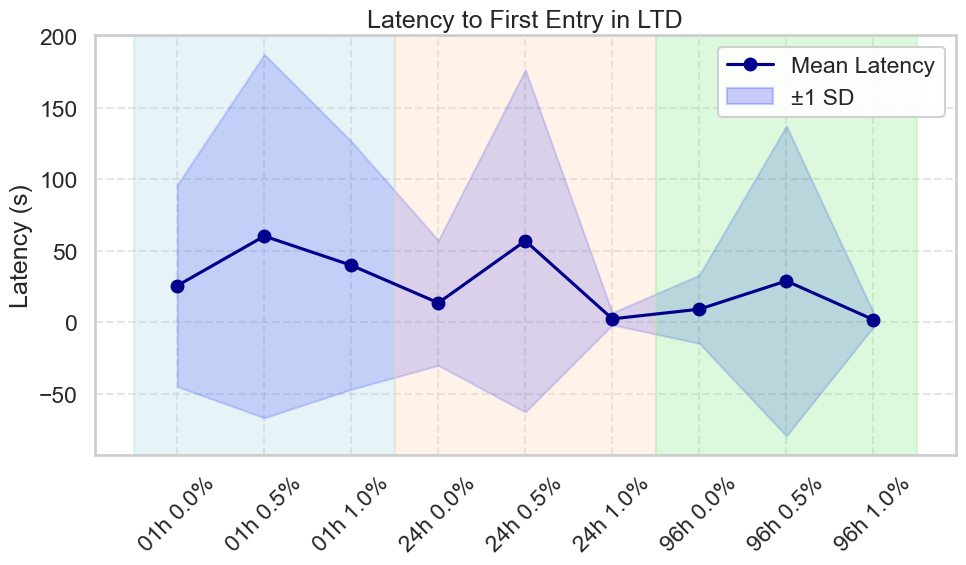

In [9]:
# Visualizing latency by group with mean and SD
groups = ['01h 0.0%','01h 0.5%','01h 1.0%',
          '24h 0.0%','24h 0.5%','24h 1.0%',
          '96h 0.0%','96h 0.5%','96h 1.0%']

mean_values = [25.64, 60.31, 39.88,
               13.60, 57.00, 2.43,
               9.19, 28.94, 1.86]

std_values = [70.60, 127.09, 86.73,
              43.78, 119.72, 4.24,
              23.91, 108.40, 5.11]

plt.figure(figsize=(10,6))

# Plot mean and ±1 SD
plt.plot(groups, mean_values, marker='o', color='darkblue', label='Mean Latency')
plt.fill_between(groups,
                 [m - s for m, s in zip(mean_values, std_values)],
                 [m + s for m, s in zip(mean_values, std_values)],
                 color='blue', alpha=0.2, label='±1 SD')

# Background regions without labels (so they won't appear in the legend)
plt.axvspan(-0.5, 2.5, color='#ADD8E6', alpha=0.3)
plt.axvspan(2.5, 5.5, color='#FFDAB9', alpha=0.3)
plt.axvspan(5.5, 8.5, color='#90EE90', alpha=0.3)

plt.title("Latency to First Entry in LTD")
plt.xlabel('')
plt.ylabel("Latency (s)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', framealpha=0.9)
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
In this study, <strong>latency</strong> was defined as the time required for zebrafish to make their first entry into either compartment of the LDT, thereby serving as an indicator of hesitation and exploratory drive. An increase in latency, as observed at 0.5% ethanol, suggests reduced exploratory drive and heightened hesitation, which can be interpreted as anxiogenic. Conversely, the marked decrease in latency at 1.0% ethanol reflects a faster decision to explore, indicating heightened exploratory drive rather than motor suppression. This <strong>biphasic pattern</strong> highlights ethanol’s dose-dependent modulation of decision latency, although it is essential to emphasize that <strong>latency alone cannot define the overall anxiolytic or anxiogenic profile of ethanol</strong>. Integrating latency with additional parameters, such as zone preference and locomotor activity, is necessary to accurately contextualize ethanol’s behavioral effects (<a href="https://pubmed.ncbi.nlm.nih.gov/26026898/" target="_blank" rel="noopener">Magno et al., 2015</a>; <a href="https://www.sciencedirect.com/science/article/abs/pii/S0091305718305586" target="_blank" rel="noopener">Mathur &amp; Guo, 2011</a>; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3804555/" target="_blank" rel="noopener">Stewart et al., 2013</a>).
</p>

#### First Choice

#### Time in the Bright

#### Number of Changes

#### Mean Time per Change (MTPC)

---

<div style="text-align: center;">
    <h2>The Novel Tank Test</h2>
</div>

### Time of Movement

#### Movement on the Bottom Portion

#### Movement on the Upper Portion

#### Total Movement

### Distance Covered

#### Distance swam in the Bottom Portion

#### Distance swam in the Upper Portion

#### Total Distance

### Velocity

#### Mean Velocity on the Bottom Portion

#### Mean Velocity on the Upper Portion

#### Mean Velocity Overall

---

<div style="text-align: center;">
    <h2>The Endurance Test</h2>
</div>

![](images/endurance.jpg)

### Attempts

### Endurance Index

---

<div style="text-align: center;">
    <h2>Biometric and Physiologic</h2>
</div>

![](images/bio.jpg)